### 📊 Análise Exploratória de Dados

Nesta etapa inicial, o foco é entender melhor o comportamento dos dados. Vamos identificar valores nulos, verificar a distribuição das variáveis e explorar possíveis padrões que possam trazer bons insights.

Além disso, testes estatísticos serão aplicados para descobrir se existem diferenças significativas entre grupos, o que pode ajudar a levantar hipóteses e direcionar melhor as próximas análises.


In [2]:
import pandas as pd
import numpy as np
from scipy.stats import kruskal
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

# Testes estatisticos
from scipy.stats import mannwhitneyu   # Comparar duas amostras independentes
from scipy.stats import levene  #verificar se duas ou mais amostras possuem variancias iguais

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Decomposicao de Séries temporais
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings('ignore')

In [3]:
caminho = r"C:\Users\eduar\OneDrive\Documentos\SandoBox\Projetos\PriceCast\Dataset\dados_milk.xlsx"
dados = pd.read_excel(caminho)

# Padroniza as colunas
dados.columns = [col.strip().lower().replace(" ", "_") for col in dados.columns]

In [4]:
dados.columns

Index(['mês', 'produção_de_leite_(milhões/l)', 'importações_(milhões/l)',
       'exportações_(milhões/l)', 'oferta_total_(milhões_de_litros)',
       'população_(milhões_de_pessoas)', 'oferta_per_capita_(litros/mês)',
       'taxa_de_desemprego_%)', 'massa_salarial_(mihões_de_reais)',
       'leite_uht_indústria_(r$/litro)', 'leite_uht_supermercado_(r$/litro)',
       'preço_do_leite_ao_produtor_(r$/litro)'],
      dtype='object')

In [5]:
dicionario_de_dados = {
    "Mês": "Referência mensal dos dados apresentados.",
    "Produção de Leite (milhões)": "Quantidade total de leite produzida no mês (em milhões de litros).",
    "Importações (milhões)": "Volume de leite importado do exterior no mês (em milhões de litros).",
    "Exportações (milhões)": "Volume de leite exportado para outros países no mês (em milhões de litros).",
    "Oferta Total (milhões de litros)": "Soma da produção nacional com as importações, menos as exportações. Representa o total de leite disponível no mercado interno.",
    "População (milhões de pessoas)": "População brasileira estimada no mês (em milhões de habitantes).",
    "Per Capita (litros/mês)": "Consumo médio de leite por habitante no mês (em litros). Calculado como oferta total dividida pela população.",
    "Taxa de Desemprego (%)": "Porcentagem da população economicamente ativa que está desempregada no mês.",
    "Massa Salarial (milhões de reais)": "Soma dos salários pagos aos trabalhadores em geral no mês (em milhões de reais).",
    "UHT Indústria (R$/litro)": "Preço médio do leite UHT (longa vida) vendido da indústria para o comércio, por litro.",
    "UHT Supermercado (R$/litro)": "Preço médio do leite UHT vendido nos supermercados ao consumidor, por litro.",
    "Preço do Leite ao Produtor (R$/litro)": "Preço médio pago ao produtor de leite por litro."
}


In [6]:
dados.rename(columns={
    "mês": "data",
    "produção_de_leite_(milhões/l)": "producao_leite",
    "importações_(milhões/l)": "importacoes",
    "exportações_(milhões/l)": "exportacoes",
    "oferta_total_(milhões_de_litros)": "oferta_total",
    "população_(milhões_de_pessoas)": "populacao_pessoas",
    "oferta_per_capita_(litros/mês)": "oferta_per_capita",
    "taxa_de_desemprego_%)": "taxa_desemprego",
    "massa_salarial_(mihões_de_reais)": "massa_salarial",
    "leite_uht_indústria_(r$/litro)": "leite_uht_industria",
    "leite_uht_supermercado_(r$/litro)": "leite_uht_supermercado",
    "preço_do_leite_ao_produtor_(r$/litro)": "preco_leite_produtor"
}, inplace=True)

dados.head(5)

,data,producao_leite,importacoes,exportacoes,oferta_total,populacao_pessoas,oferta_per_capita,taxa_desemprego,massa_salarial,leite_uht_industria,leite_uht_supermercado,preco_leite_produtor
0,2007-01-01,1629.549,51.486829,37.232129,1643.803700,188.496928,8.720586,NaN,NaN,NaN,1.422492,0.450872
1,2007-02-01,1405.073,44.565910,39.461382,1410.177528,188.657245,7.474812,NaN,NaN,NaN,1.412007,0.480057
2,2007-03-01,1444.693,23.326896,40.938828,1427.081068,188.817561,7.557989,NaN,NaN,NaN,1.427207,0.500857
3,2007-04-01,1333.077,19.810018,33.958065,1318.928953,188.977878,6.979277,NaN,NaN,NaN,1.471410,0.544433
4,2007-05-01,1359.253,16.034976,45.073625,1330.214351,189.138194,7.033029,NaN,NaN,NaN,1.613760,0.586239


In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   data                    228 non-null    datetime64[ns]
 1   producao_leite          228 non-null    float64       
 2   importacoes             228 non-null    float64       
 3   exportacoes             228 non-null    float64       
 4   oferta_total            228 non-null    float64       
 5   populacao_pessoas       228 non-null    float64       
 6   oferta_per_capita       228 non-null    float64       
 7   taxa_desemprego         154 non-null    float64       
 8   massa_salarial          154 non-null    float64       
 9   leite_uht_industria     127 non-null    float64       
 10  leite_uht_supermercado  218 non-null    float64       
 11  preco_leite_produtor    216 non-null    float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 21

In [8]:
# Extracao do ano e do mes
dados['ano'] = dados['data'].dt.year
dados['mes'] = dados['data'].dt.month

In [9]:
dados.head(3)

,data,producao_leite,importacoes,exportacoes,oferta_total,populacao_pessoas,oferta_per_capita,taxa_desemprego,massa_salarial,leite_uht_industria,leite_uht_supermercado,preco_leite_produtor,ano,mes
0,2007-01-01,1629.549,51.486829,37.232129,1643.803700,188.496928,8.720586,NaN,NaN,NaN,1.422492,0.450872,2007,1
1,2007-02-01,1405.073,44.565910,39.461382,1410.177528,188.657245,7.474812,NaN,NaN,NaN,1.412007,0.480057,2007,2
2,2007-03-01,1444.693,23.326896,40.938828,1427.081068,188.817561,7.557989,NaN,NaN,NaN,1.427207,0.500857,2007,3


**OBS**

Como a ideia do projeto é fazer a projeção para a variável dependente "preco_leite_produtor", iremos remover os registros de 2025, e iremos usar eles somente na hora do deploy

In [10]:
dados_2025 = dados[dados['ano'] == 2025]
dados = dados[dados['ano'] != 2025]

In [ ]:
# Salvando esses dados para fazer usar no deploy do modelo
dados_2025.to_csv(r"C:\Users\eduar\OneDrive\Documentos\SandoBox\Projetos\PriceCast\Dataset\dados_deploy.csv")

Taxa de valores nulos do conjunto de dados

In [11]:
taxa_nulos = dados.isnull().sum()/len(dados)
taxa_nulos

data                      0.000000
producao_leite            0.000000
importacoes               0.000000
exportacoes               0.000000
oferta_total              0.000000
populacao_pessoas         0.000000
oferta_per_capita         0.000000
taxa_desemprego           0.287037
massa_salarial            0.287037
leite_uht_industria       0.421296
leite_uht_supermercado    0.000000
preco_leite_produtor      0.000000
ano                       0.000000
mes                       0.000000
dtype: float64

In [12]:
dados.describe()

,data,producao_leite,importacoes,exportacoes,oferta_total,populacao_pessoas,oferta_per_capita,taxa_desemprego,massa_salarial,leite_uht_industria,leite_uht_supermercado,preco_leite_produtor,ano,mes
count,216,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,154.000000,154.000000,125.000000,216.000000,216.000000,216.000000,216.000000
mean,2015-12-16 10:53:20,1924.353731,97.173912,21.106277,2000.421367,202.319681,9.861063,0.100455,208397.935065,2.968820,2.989757,1.319536,2015.500000,6.500000
min,2007-01-01 00:00:00,1324.948000,10.188356,2.414308,1306.775293,188.496928,6.903252,0.061000,121994.000000,1.568627,1.412007,0.450872,2007.000000,1.000000
25%,2011-06-23 12:00:00,1767.601000,61.638890,7.031172,1830.724531,196.129250,9.245598,0.075250,165000.750000,2.191693,2.215812,0.781050,2011.000000,3.750000
50%,2015-12-16 12:00:00,1958.527000,84.780280,10.727576,2033.045700,203.076605,9.950747,0.094500,198723.000000,2.729022,2.777894,1.013578,2015.500000,6.500000
75%,2020-06-08 12:00:00,2100.720250,133.284569,26.528047,2196.108137,209.085840,10.689359,0.123000,236621.500000,3.600700,3.620236,1.802575,2020.000000,9.250000
max,2024-12-01 00:00:00,2348.481000,244.038934,112.347610,2517.040863,212.932620,12.003825,0.149000,351063.000000,6.447781,6.349700,3.570700,2024.000000,12.000000
std,NaN,223.105693,53.035743,23.113584,267.272151,7.235492,1.075320,0.026648,58453.308737,0.976901,1.078435,0.711069,5.200179,3.460071


In [13]:
dados.columns

Index(['data', 'producao_leite', 'importacoes', 'exportacoes', 'oferta_total',
       'populacao_pessoas', 'oferta_per_capita', 'taxa_desemprego',
       'massa_salarial', 'leite_uht_industria', 'leite_uht_supermercado',
       'preco_leite_produtor', 'ano', 'mes'],
      dtype='object')

### O aumento da população está associado ao crescimento do valor pago aos produtores de leite?

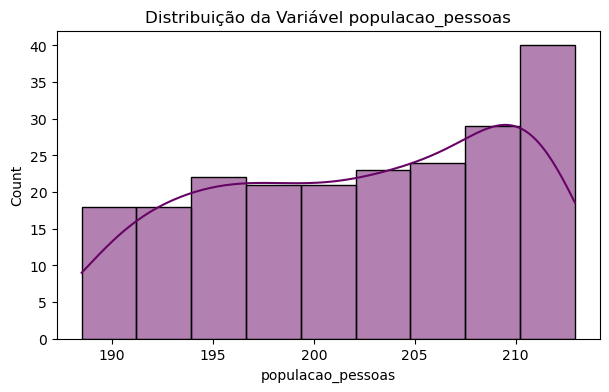

In [14]:
plt.figure(figsize= (7, 4))
sns.histplot(data = dados, x = dados.populacao_pessoas, kde = True, color = '#660465')
plt.title('Distribuição da Variável populacao_pessoas')
plt.show()

Análise

- É possível notar o aumento da populacao de pessoas, pode-se inferir que o consumo de leite também aumente. Nesse sentido, espera-se um aumento no valor aos produtores para produzir mais leite

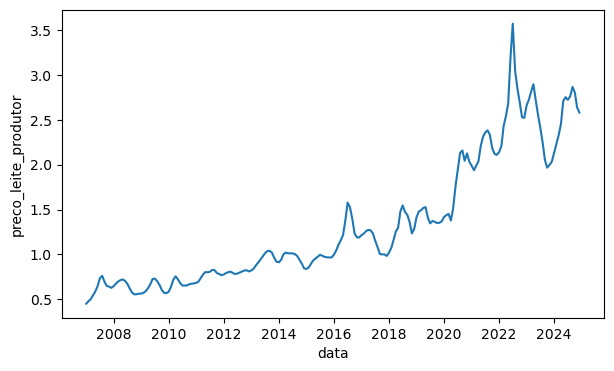

In [15]:
plt.figure(figsize= (7, 4))
sns.lineplot(data = dados, x = dados['data'], y = dados['preco_leite_produtor'])
plt.show()

Análise

- Com base no gráfico acima, pode-se visualizar uma tendência de crescimento ao passar do tempo. Isso se deve do aumento da população de pessoas

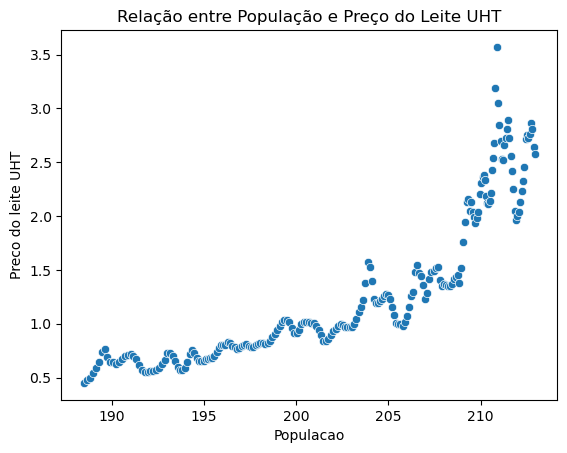

In [16]:
# Vizualiando a dispersao entre essas duas variáveis
sns.scatterplot(data = dados, x = 'populacao_pessoas', y = 'preco_leite_produtor')
plt.title('Relação entre População e Preço do Leite UHT')
plt.xlabel('Populacao')
plt.ylabel('Preco do leite UHT')
plt.show()

Aplicaremos a correlação de Pearson para verificar se há uma correlação linear entre essas duas variáveis


In [17]:
corr = dados['populacao_pessoas'].corr(dados['preco_leite_produtor'])
print(f"Correlação de Pearson: {corr:.2f}")

Correlação de Pearson: 0.87


Valores mais proxímos de 1 indicam forte correlação positiva. No nosso caso, uma correlação de 0.87 é considerata fortemente positiva. Ou seja, existe uma forte relação entre a variáveil preco_leite_produtor e populacao de pessoas.

Agora iremos elaborar duas hipótese

- **Hipótese Nula (H0)**: A população não tem efeito significativo sobre a produção do leite.
- **Hipótese Alternativa (H1)**: A população tem efeito significativo sobre a produção de leite.


Usaremos o modelo de regressão linear simples para testar essas hipóteses. Considera-se um nível de significância de 5% (0.05)

In [18]:
X = dados['populacao_pessoas']
y = dados['preco_leite_produtor']

X = sm.add_constant(X)
modelo = sm.OLS(y, X).fit()
print(modelo.summary())

                             OLS Regression Results                             
Dep. Variable:     preco_leite_produtor   R-squared:                       0.757
Model:                              OLS   Adj. R-squared:                  0.756
Method:                   Least Squares   F-statistic:                     668.3
Date:                  Sat, 19 Apr 2025   Prob (F-statistic):           9.30e-68
Time:                          18:47:48   Log-Likelihood:                -79.347
No. Observations:                   216   AIC:                             162.7
Df Residuals:                       214   BIC:                             169.4
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             

Como o p-valor é menor que 0.05, rejeitamos a hipótese nula e que a correlação entre as duas variáveis é de 0.87
Concluímos que a população tem um efeito estatisticamente significativo sobre a produção de leite ao longo do tempo.

### Existe diferença significativa no preco do leite do supermercado e o preco do leite ao produto?

- Para isso iremos ver a dispersao entre essas duas variáveis

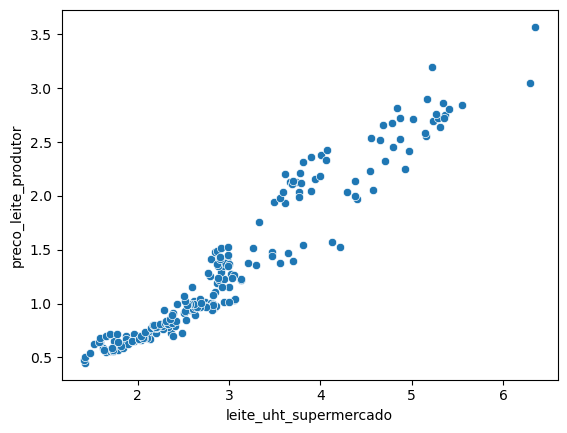

Correlação de Pearson: 0.97


In [19]:
sns.scatterplot(data = dados, x = 'leite_uht_supermercado', y = 'preco_leite_produtor')
plt.show()

corr = dados['leite_uht_supermercado'].corr(dados['preco_leite_produtor'])
print(f"Correlação de Pearson: {corr:.2f}")

Análise

- Podemos ver que ambas estão em crescimento juntas, quando uma cresce a outra também tende a crescer. E a correlação entre elas é fortemente positiva com um valor de 0.97, em outras palavras elas aumetam e diminuem proporcionalmente.

### Teste de Mann-Whitney U

O teste de Mann-Whitney é um teste estatístico não paramétrico utilizado para comparar duas amostras independentes. Ele verifica se há uma diferença estatisticamente significativa nas distribuições das duas amostras. Ele é usado quando os dados não seguem uma distribuição normal (o que já foi verificado, mesmo transformando os dados, a variavel ainda sim, continua nao seguindo uma distribuicao normal).

Hipóteses do teste

- Hipótese nula (H₀): As duas amostras vêm da mesma distribuição (não há diferença significativa).
- Hipótese alternativa (H₁): As amostras vêm de distribuições diferentes (há diferença significativa).

In [20]:
grupo_supermercado = dados['leite_uht_supermercado']
grupo_produtor = dados['preco_leite_produtor']


stat, p = mannwhitneyu(grupo_supermercado, grupo_produtor, alternative='two-sided')

print(f"Estatística U = {stat:.4f}")
print(f"p-valor = {p:.6f}")

# Interpretação
if p < 0.05:
    print("Há diferença estatisticamente significativa entre os grupos.")
else:
    print("Não há diferença estatisticamente significativa entre os grupos.")

Estatística U = 42528.0000
p-valor = 0.000000
Há diferença estatisticamente significativa entre os grupos.


### Teste de Levene (para variâncias homogêneas)

Esse teste verifica se as variâncias das amostras são iguais (homocedasticidade).Útil também quando os dados não seguem uma distribuição normal, o que já foi verificado. 

- Se o p-valor for menor que o nível de significância (alpha): Rejeitamos a **hipótese nula** e concluímos que as variâncias não são homogêneas (pelo menos uma variância é diferentes)
- Se o p-valor for maior que α: **Não** rejeitamos a hipótese nula e concluímos que as variâncias são homogêneas (são iguais)

In [21]:
# Teste de Levene para igualdade de variâncias
stat, p = levene(
    dados['leite_uht_supermercado'],
    dados['preco_leite_produtor']
)

print(f"Estatística de Levene: {stat:.4f}, P-valor: {p:.4f}")

# Interpretação
if p < 0.05:
    print("Há diferença estatisticamente significativa nas variâncias das duas amostras.")
else:
    print("Não há diferença estatisticamente significativa nas variâncias das duas amostras.")


Estatística de Levene: 19.2054, P-valor: 0.0000
Há diferença estatisticamente significativa nas variâncias das duas amostras.


Analise

Como o valor p foi muito baixo nos dois testes, podemos concluir que:

- Provavelmente existe diferença estatisticamente significativa entre os precos do leite no supermercado e no produtor
- Eventualmente as distribuições dos precos são diferentes, verificado atráves do teste de Mann-Whitney U
- Muito provavelmente as variâncias também são diferentes, verificado atráves do teste de Levene.

Ainda sim, as variáveis apresentam uma alta correlação positiva, sugerindo que seguem uma tendência similar, mas com valores e dispersões distintas. Além disso, atráveis da descrição dos dados, que a média dos valores do leite_uht_supermercado e preco_leite_produtor são muito diferentes, com leite_uht_supermercado bem maior que o preco_leite_produtor dando a entender que os valores repassados para os produtos são menores do que os consumidores pagando no supermercado.

### O valor das importacoes e exportacoes está aumentando ao passar do tempo?

- Importação é o processo de trazer produtos ou serviços de um país estrageiro para o para o país de destino. O objetivo é adquirir itens que não são produzidos localmente ou que são mais baratos ou de melhor qualidade em outros mercados

- A exportação é o processo de enviar produtos ou serviços de um país para outro, geralmente com o objetivo de vender para mercados internacionais.

In [22]:
importacao_agrupado = dados.groupby('ano')['importacoes'].sum().reset_index(name = 'soma')
exportacoes_agrupado = dados.groupby('ano')['exportacoes'].sum().reset_index(name = 'soma')

# Arredondando os valores
importacao_agrupado['soma'] = importacao_agrupado['soma'].round(2)
exportacoes_agrupado['soma'] = exportacoes_agrupado['soma'].round(2)

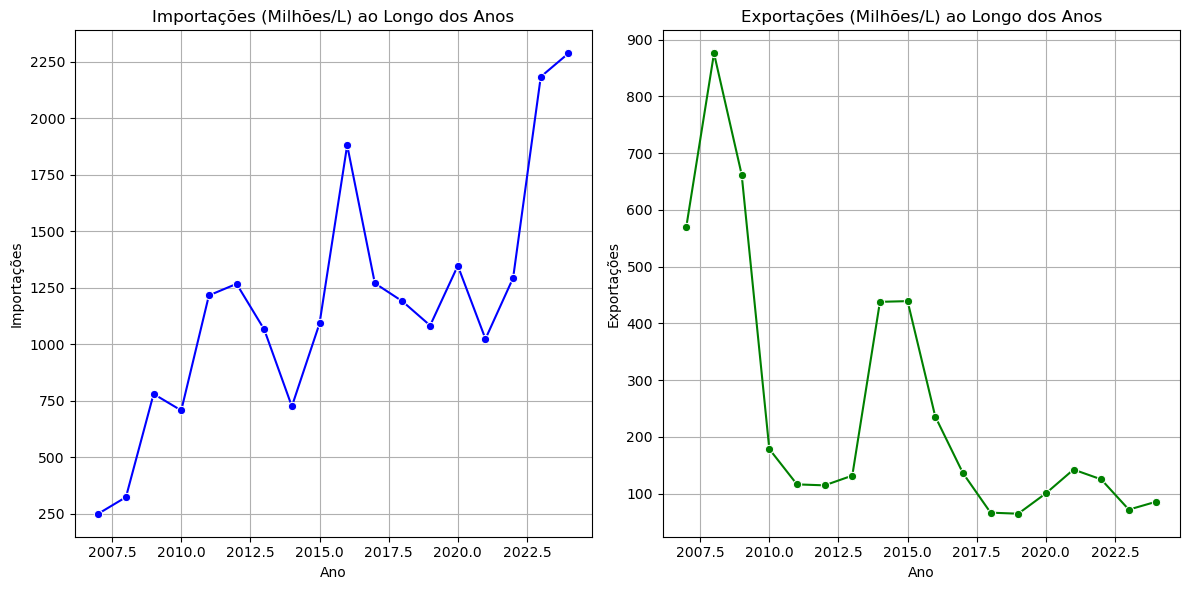

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.lineplot(data=importacao_agrupado, x='ano', y='soma', ax=ax1, marker='o', color='blue')
ax1.set_title('Importações (Milhões/L) ao Longo dos Anos')
ax1.set_xlabel('Ano')
ax1.set_ylabel('Importações')
ax1.grid(True)

# Gráfico de exportações com Seaborn
sns.lineplot(data=exportacoes_agrupado, x='ano', y='soma', ax=ax2, marker='o', color='green')
ax2.set_title('Exportações (Milhões/L) ao Longo dos Anos')
ax2.set_xlabel('Ano')
ax2.set_ylabel('Exportações')
ax2.grid(True)

plt.tight_layout()
plt.show()

Analise

É possível observar que a empresa está importando mais produtos de mercados estrangeiros do que exportando para esses mesmos locais. Isso fica evidente com a queda registrada um pouco depois de 2007, ano em que as importações começaram a aumentar de forma contínua ao longo do tempo. Ou seja existe um gasto maior comprando do que obtendo lucro vendendo.

### Há diferença significativa na produção de leite entre os anos com maior taxa de desemprego e os com menor taxa?

O objetivo é saber se a produção de leite muda de forma relevante entre dois grupos de anos:

- Anos com maior taxa de desemprego
- Anos com menor taxa de desemprego

OBS: Taxa de desemprego possui algunas valores nulos com base nisso, esses valores nulos representacao aproximadamente 28% dos dados. Por conta disso, foi optado pela exclusão desses valores apenas para realizar essa análise.

- Grupo 1 com maior taxa de desemprego (acima da mediana)
- Grupo 2 com menor taxa de desemprego (abaixo da mediana)

Foi escolhido a mediana por ser uma medida de tendência central mais confiável que a média em boa parte dos casos.

In [24]:
mediana_desemprego = dados['taxa_desemprego'].dropna()
mediana_desemprego = dados['taxa_desemprego'].median()

# Criação dos grupos
grupo_maior_desemprego = dados[dados['taxa_desemprego'] > mediana_desemprego]['producao_leite']
grupo_menor_desemprego = dados[dados['taxa_desemprego'] <= mediana_desemprego]['producao_leite']

In [25]:
stat, p = mannwhitneyu(grupo_maior_desemprego, grupo_menor_desemprego, alternative='two-sided')

print(f"Estatística U = {stat:.4f}")
print(f"p-valor = {p:.6f}")

if p < 0.05:
    print("Há diferença estatisticamente significativa na produção de leite entre os anos com maior e menor taxa de desemprego.")
else:
    print("Não há diferença estatisticamente significativa na produção de leite entre os dois grupos.")

Estatística U = 3342.0000
p-valor = 0.173101
Não há diferença estatisticamente significativa na produção de leite entre os dois grupos.


Após aplicar o teste de Mann-Whitney U para comparar a produção de leite entre os anos com taxa de desemprego acima e abaixo da mediana, obtivemos um valor de p superior a 0.05. 
Isso indica que não há evidência estatística suficiente para afirmar que há diferença significativa na produção de leite entre os dois grupos. Ou seja, com base nos dados disponíveis, a taxa de desemprego não parece influenciar significativamente a produção de  leite.

### O preço do leite ao produtor varia significativamente entre os meses do ano?

Usaremos Kruskal-Wallis, ele verifica se duas ou mais amostras independentes (com dados contínuos ou ordinais) vêm da mesma distribuiçaõ. Ou seja, ele compara a posição (mediana) dos grupos.

- Cada grupo deve ser um array ou lista de valores de uma única categoria da variável independente, nesse caso a variável mês.
- Ele espera um array por mês como argumento.

In [26]:
grupo_por_mes = dados.groupby('mes')['preco_leite_produtor'].sum().reset_index(name = 'soma')
grupo_por_mes['soma'] = grupo_por_mes['soma'].round(2)

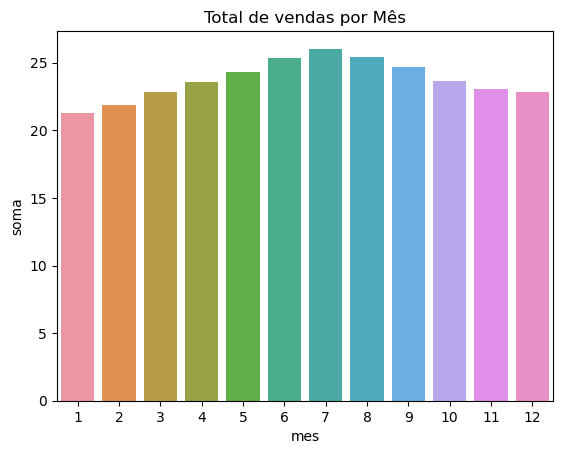

In [27]:
sns.barplot(data = grupo_por_mes, x = 'mes', y = 'soma')
plt.title("Total de vendas por Mês")
plt.show()

In [28]:
grupos_por_mes = [grupo['preco_leite_produtor'].values for nome, grupo in dados.groupby('mes')]

# Teste de Kruskal-Wallis
stat, p = kruskal(*grupos_por_mes)

print(f"Estatística de Kruskal-Wallis: {stat:.4f}")
print(f"p-valor: {p:.6f}")

# Interpretação
if p < 0.05:
    print("Há diferença estatisticamente significativa no preço do leite ao produtor entre os meses.")
else:
    print("Não há diferença estatisticamente significativa no preço do leite ao produtor entre os meses.")

Estatística de Kruskal-Wallis: 2.8832
p-valor: 0.992181
Não há diferença estatisticamente significativa no preço do leite ao produtor entre os meses.


Análise

Podemos concluir que não existe diferença significativa no preço do leite ao produtor durante os meses do ano.

### Existe alguma tendência seja de crescimento ou decaimento da taxa de desemprego?

Para responder essa pergunta, faremos a indexação da variável data para fazermos uma análise baseada em séries temporais a fim de identificar alguma tendência ou sazonalidade no comportamento dessas variáveis.

In [29]:
# Fazendo uma copia do dataframe
serie = dados.copy()

In [30]:
# Colocando a coluna data como index
serie.set_index('data', inplace= True)

In [31]:
# Removendo os valores nulos
serie = serie.dropna(subset=['taxa_desemprego'])

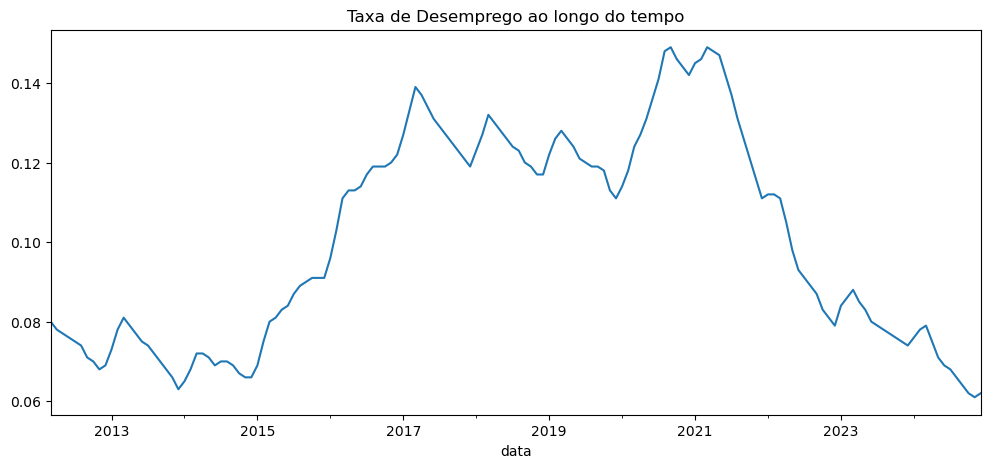

In [32]:
serie['taxa_desemprego'].plot(figsize=(12,5), title='Taxa de Desemprego ao longo do tempo')
plt.show()

Análise

- Há uma tendência de crescimento a partir de 2015, um pico entre 2020-2021, e uma queda logo após isso.
- As flutuações (oscilações sazonais) da taxa de desemprego parecem manter uma aplitude, mesmo com o aumento ou queda da tendência.

Com base observado no gráfico acima, o tipo de modelo que iremos usar é o aditivo para fazer a decomposição das séries temporais, pois a série da taxa de desemprego apresenta variações sazonais com amplitude aproximadamente constante ao longo do tempo.

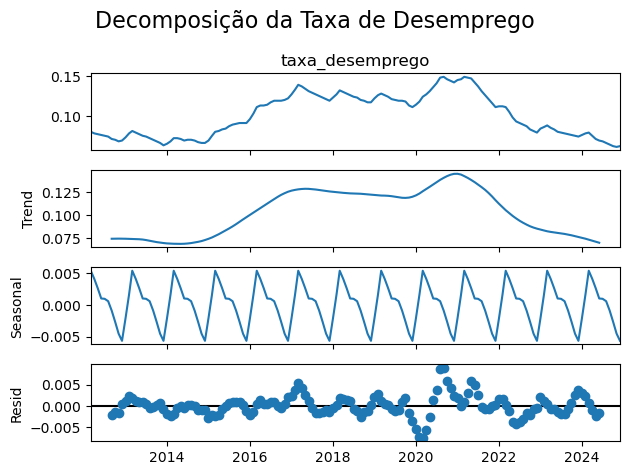

In [33]:
modelo_aditivo = seasonal_decompose(serie['taxa_desemprego'], model = 'additive', period = 12)
modelo_aditivo.plot()
plt.suptitle('Decomposição da Taxa de Desemprego', fontsize=16)
plt.tight_layout()
plt.show()

Análise

**Tendência**

- Mostra tendência de longo prazo da taxa de desemprego.
- Entre 2014 e 2021, hoube aumento constante da taxa de desemprego (possivelmente causado por alguns eventos econômicos)
- Após 2021, a tendência começã a cair gradualmente.

Esse tipo de análise, ajuda a identificar se o fenômeno está crescendo, caindo ou se mantendo estável no longo prazo.


**Sazonalidade**

- O padrão de sobir e descer da mesma forma, com a amplitude igual, mostra-se ser um modelo aditivo


Esse tipo de análise, mostra se há algum padrão sazonal previsível, como aumento do desemprego em certo período do ano.

**Resíduos**

- São os valores não explicados pela tendência nem pela sazonalidade.


Podemos concluir que, com base na análise feita acima, a taxa de desemprego está com tendência de queda.

### A média dos valores do leite do supermercado está aumentando ou diminuindo ao longo do tempo?

Para isso iremos utilizar a média móvel. A principal diferença entre ela e simplesmente usar a média é que, a segunda possui seu valor estático, ela representa o ponto de equilibrio dos dados. Ela não considera a ordem dos dados no tempo, apenas calcula o valor médio do conjunto.

Agora a média móvel Calcula média de um subconjunto contínuo dos dados, deslizando esse subconjunto ao longo do tempo.

In [34]:
serie_leite_supermercado = serie[['leite_uht_supermercado']]
serie_leite_supermercado['leite_super_media_movel_simples'] = serie_leite_supermercado.rolling(window= 12).mean()

In [35]:
serie_leite_supermercado['leite_uht_supermercado'].mean()

3.4145828291874185

In [36]:
serie_leite_supermercado.head(3)

,leite_uht_supermercado,leite_super_media_movel_simples
data,,
2012-03-01,2.171227,NaN
2012-04-01,2.269476,NaN
2012-05-01,2.267050,NaN


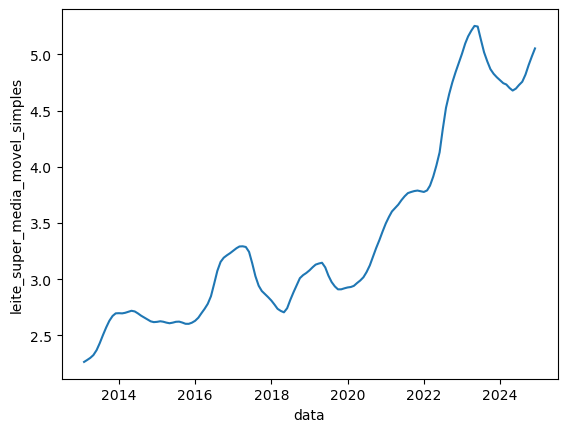

In [37]:
sns.lineplot(serie_leite_supermercado['leite_super_media_movel_simples'])
plt.show()

Análise

Pode-se perceber que a média tem uma tendência de crescimento após uma leva queda entre os anos de 2022 e 2024. Além disso, o mesmo está em crescimento desde 2014.

### O valor das importações é maior ou menor que o valor das exportações? A diferença é estatisticamente significativa?

In [38]:
dados.head(3)

,data,producao_leite,importacoes,exportacoes,oferta_total,populacao_pessoas,oferta_per_capita,taxa_desemprego,massa_salarial,leite_uht_industria,leite_uht_supermercado,preco_leite_produtor,ano,mes
0,2007-01-01,1629.549,51.486829,37.232129,1643.803700,188.496928,8.720586,NaN,NaN,NaN,1.422492,0.450872,2007,1
1,2007-02-01,1405.073,44.565910,39.461382,1410.177528,188.657245,7.474812,NaN,NaN,NaN,1.412007,0.480057,2007,2
2,2007-03-01,1444.693,23.326896,40.938828,1427.081068,188.817561,7.557989,NaN,NaN,NaN,1.427207,0.500857,2007,3


In [39]:
media_importacoes = dados['importacoes'].mean()
media_exportacoes = dados['exportacoes'].mean()

print(f'Média das Importações: {media_importacoes}')
print(f'Média das Exportações: {media_exportacoes}')

Média das Importações: 97.17391156729937
Média das Exportações: 21.106276540339508


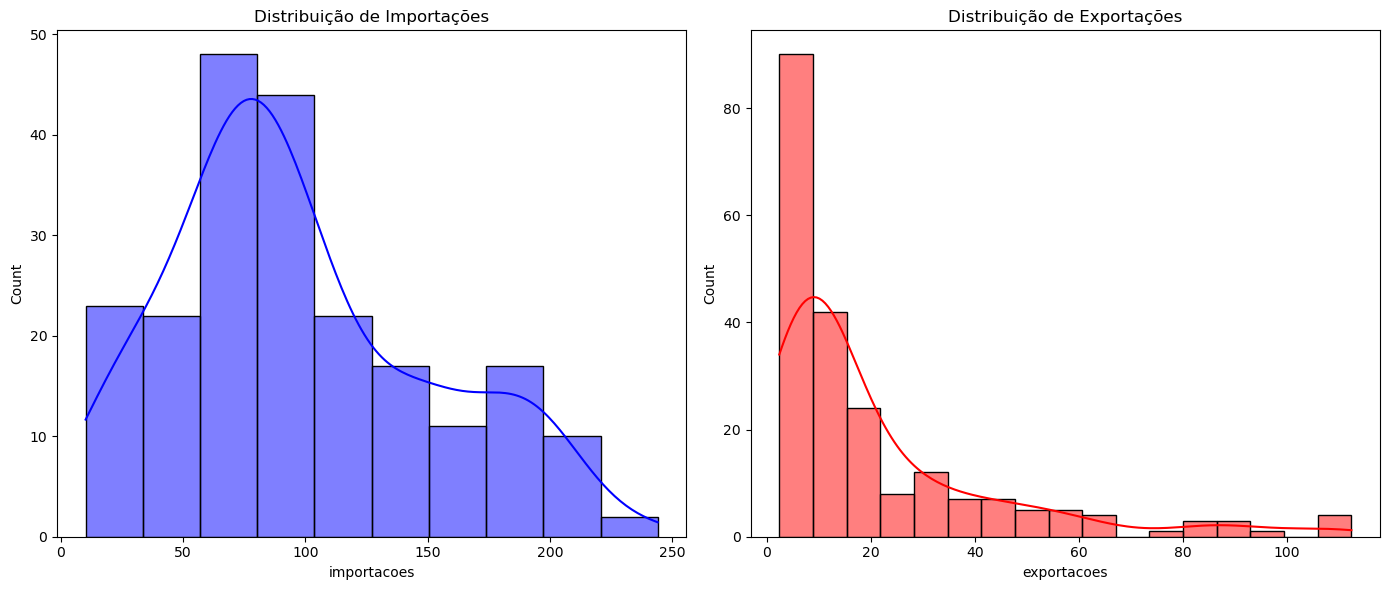

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histograma para Importações
sns.histplot(dados['importacoes'], kde=True, color='blue', ax=axes[0])
axes[0].set_title('Distribuição de Importações')

# Histograma para Exportações
sns.histplot(dados['exportacoes'], kde=True, color='red', ax=axes[1])
axes[1].set_title('Distribuição de Exportações')

# Ajustando layout
plt.tight_layout()
plt.show()

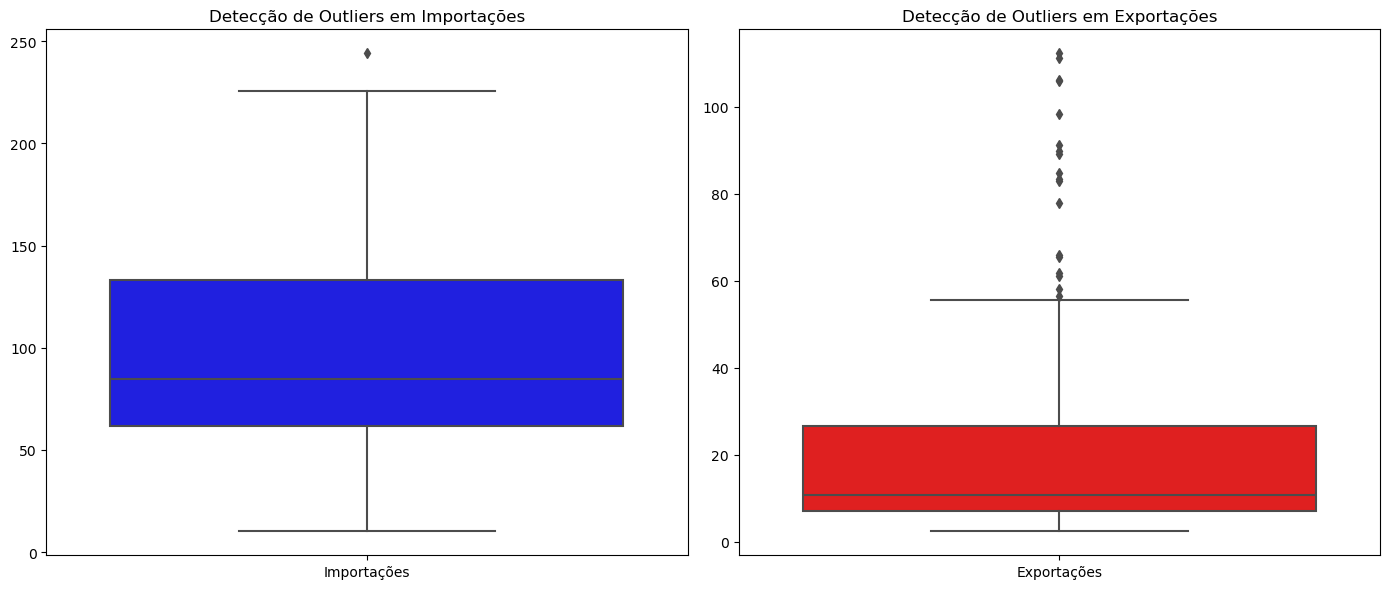

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot para Importações
sns.boxplot(data=dados['importacoes'], color='blue', ax=axes[0])
axes[0].set_title('Detecção de Outliers em Importações')
axes[0].set_xticklabels(['Importações'])

# Boxplot para Exportações
sns.boxplot(data=dados['exportacoes'], color='red', ax=axes[1])
axes[1].set_title('Detecção de Outliers em Exportações')
axes[1].set_xticklabels(['Exportações'])

# Ajustando layout para não sobrepor os gráficos
plt.tight_layout()
plt.show()

In [42]:
import_export = dados[['importacoes', 'exportacoes']]
import_export.describe()

,importacoes,exportacoes
count,216.000000,216.000000
mean,97.173912,21.106277
std,53.035743,23.113584
min,10.188356,2.414308
25%,61.638890,7.031172
50%,84.780280,10.727576
75%,133.284569,26.528047
max,244.038934,112.347610


Análise:

Com base nos gráficos apresentados, é possível identificar indícios da presença de outliers na variável Exportações. O histograma mostra uma forte assimetria à direita, indicando a existência de valores extremamente altos em relação à maioria dos dados. Além disso, o boxplot exibe diversos pontos acima do limite superior, o que reforça essa suspeita. A estatística descritiva também corrobora a análise: a variável apresenta um valor mínimo de 2,4, um valor máximo de 112,34 e um desvio padrão elevado de 23,11, sugerindo uma grande dispersão nos dados. Diante disso, será aplicado um algoritmo de aprendizado não supervisionado para identificar automaticamente esses valores discrepantes de forma eficaz.

### Utilização do Modelo DBSCAN para detectar outliers

O DBSCAN é um algoritmo de clusterização baseado em densidade que identifica grupos de pontos próximos entre si. Pontos que não fazem parte de nenhum grupo, por estarem isolados ou em regiões de baixa densidade, são considerados outliers. Ele é eficiente para detectar valores discrepantes sem precisar definir o número de clusters previamente.

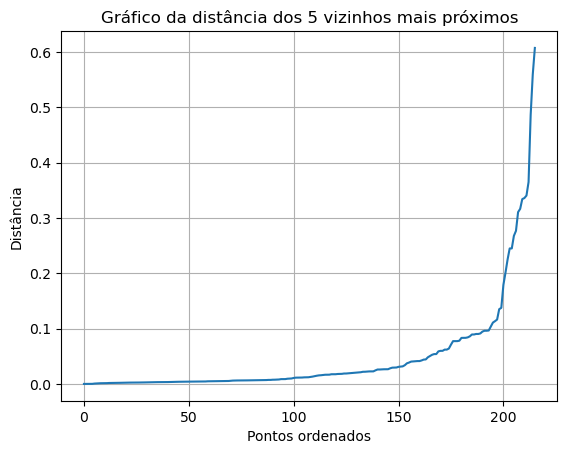

In [43]:
X = dados[['exportacoes']].values

scaler = StandardScaler()

# Padronizando os dados
X_scaled = scaler.fit_transform(X)

# Usar o gráfico de cotovelo (k-distance) para escolher o melhor eps
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)
distances = np.sort(distances[:, 4])  # índice 4 porque n_neighbors=5
plt.plot(distances)
plt.title("Gráfico da distância dos 5 vizinhos mais próximos")
plt.xlabel("Pontos ordenados")
plt.ylabel("Distância")
plt.grid()
plt.show()

In [44]:
# 4. Aplicar DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# 5. Adicionar rótulos ao DataFrame
dados['cluster'] = labels

# 6. Filtrar os outliers (rótulo == -1)
outliers = dados[dados['cluster'] == -1]

# 7. Mostrar os índices dos outliers
outlier_indices = outliers.index.tolist()
print("Índices dos outliers detectados:")
print(outlier_indices)

# Opcional: visualizar os valores de exportações que são outliers
print("\nValores de Exportações considerados outliers:")
print(outliers['exportacoes'])

Índices dos outliers detectados:
[9, 10, 11, 12, 15, 17, 18, 20, 21, 23, 30, 32, 33, 35, 87, 102]

Valores de Exportações considerados outliers:
9       65.962266
10      98.340236
11      77.975050
12      65.514096
15      89.921819
17      91.176684
18      83.013258
20     112.347610
21      89.187163
23     106.047259
30      83.537382
32     111.239943
33      84.731377
35     106.194068
87      61.075587
102     61.831420
Name: exportacoes, dtype: float64


### Verificando utilizando detecção atráves do intervalo interquartil

In [45]:
Q1 = dados['exportacoes'].quantile(0.25)  # 1º quartil
Q3 = dados['exportacoes'].quantile(0.75)  # 3º quartil
IQR = Q3 - Q1  # Intervalo interquartil

# Definindo os limites inferior e superior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificando os outliers
outliers_iqr = dados[(dados['exportacoes'] < limite_inferior) | (dados['exportacoes'] > limite_superior)]

# Pegando os índices para análise manual
outliers_indices = outliers_iqr.index.tolist()

print("Número de outliers detectados pelo método IQR:", len(outliers_iqr))
print("Índices dos outliers:", outliers_indices)

Número de outliers detectados pelo método IQR: 18
Índices dos outliers: [9, 10, 11, 12, 15, 17, 18, 19, 20, 21, 23, 30, 32, 33, 35, 87, 102, 106]


Agora os índices em mãos dos valores considerados outliers, iremos fazer a remoção deles.

In [46]:
indices_para_remover = [9, 10, 11, 12, 15, 17, 18, 20, 21, 23, 30, 32, 33, 35, 87, 102, 106]

# Remover os índices do DataFrame
dados = dados.drop(index=indices_para_remover)

Média das Importações: 101.91360754775545
Média das Exportações: 15.641444790703515


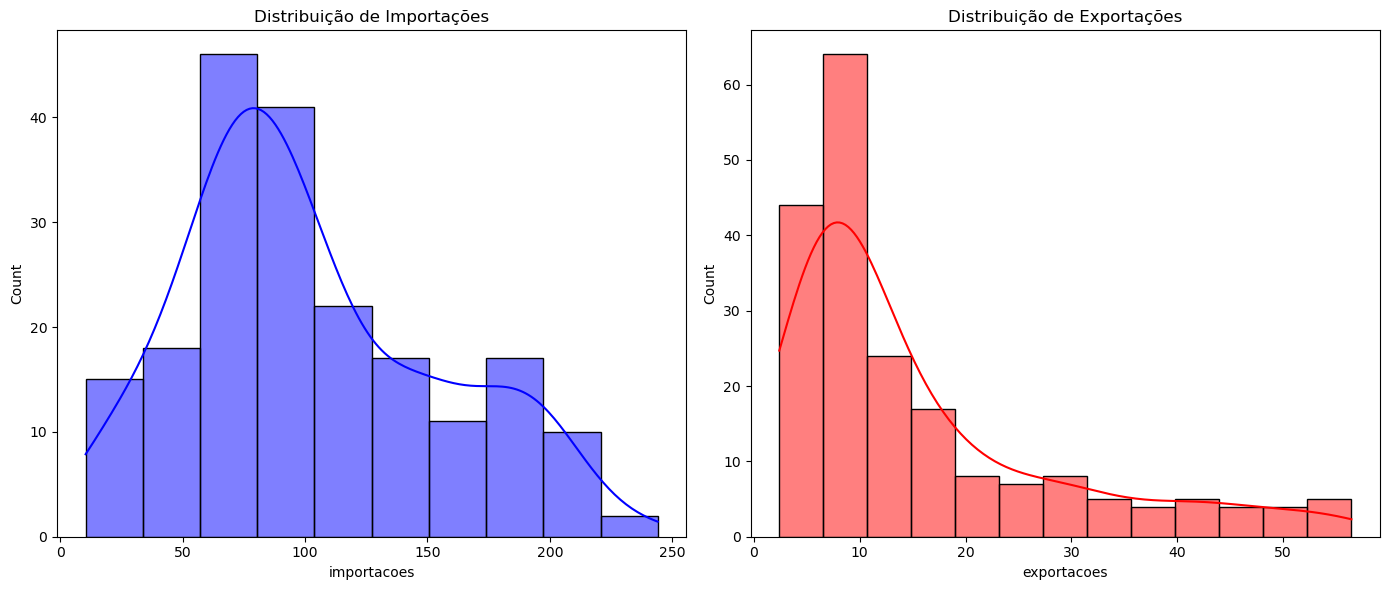

In [47]:
# Aplicando novamente os gráficos para verificar a situação
media_importacoes = dados['importacoes'].mean()
media_exportacoes = dados['exportacoes'].mean()

print(f'Média das Importações: {media_importacoes}')
print(f'Média das Exportações: {media_exportacoes}')


fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histograma para Importações
sns.histplot(dados['importacoes'], kde=True, color='blue', ax=axes[0])
axes[0].set_title('Distribuição de Importações')

# Histograma para Exportações
sns.histplot(dados['exportacoes'], kde=True, color='red', ax=axes[1])
axes[1].set_title('Distribuição de Exportações')

# Ajustando layout
plt.tight_layout()
plt.show()

**Teste de Mann-Whitney U**

- Hipótese nula (H0): As distribuições das importações e exportações são igualmente distribuídas (sem diferença significativa)
- Hipótese alternativa (H1): As distribuições das importações e exportações são diferentes

In [48]:
resultado = mannwhitneyu(dados['importacoes'], dados['exportacoes'])

# Imprime o valor-p formatado
print(f"Valor-p do Teste de Mann-Whitney: {resultado.pvalue:.6f}")

# Verifica se a diferença é estatisticamente significativa
if resultado.pvalue < 0.05:
    print("Existe diferença estatisticamente significativa entre importações e exportações.")
else:
    print("Não existe diferença estatisticamente significativa entre importações e exportações.")

Valor-p do Teste de Mann-Whitney: 0.000000
Existe diferença estatisticamente significativa entre importações e exportações.


Com base no que foi explorado e descoberto, podemos concluir que a empresa está importando mais do que vendendo e existe uma diferença significativa entre esses fatores.

### Com base nas análises acima, porque a empresa está importando mais leite do que exportando?

- Primeiramente, vamos analisar se a produção de leite interna, acompanha o aumento da população.

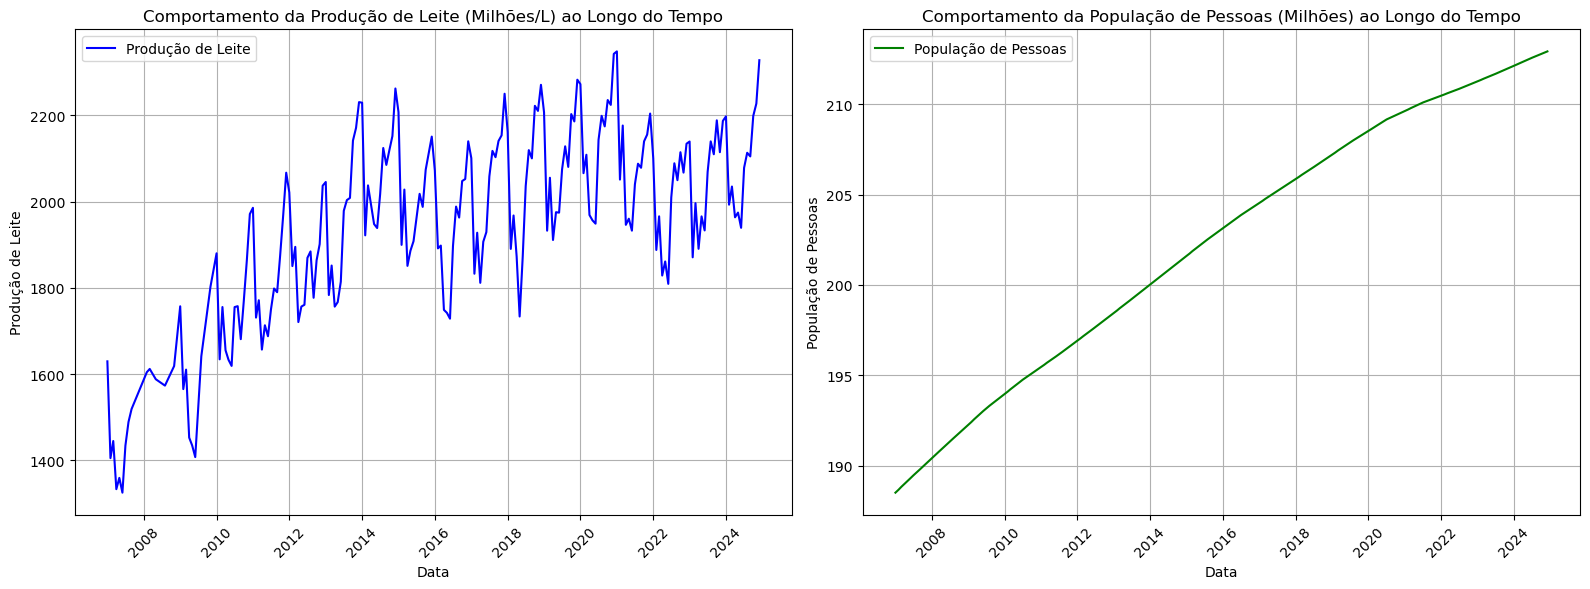

In [49]:
# Analisando a producao de leite com a variável populacao pessoas

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plotando a produção de leite ao longo do tempo
sns.lineplot(data=dados, x='data', y='producao_leite', color='b', label='Produção de Leite', ax=axes[0])
axes[0].set_title('Comportamento da Produção de Leite (Milhões/L) ao Longo do Tempo')
axes[0].set_xlabel('Data')
axes[0].set_ylabel('Produção de Leite')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend()
axes[0].grid(True)

# Plotando a população de pessoas ao longo do tempo
sns.lineplot(data=dados, x='data', y='populacao_pessoas', color='g', label='População de Pessoas', ax=axes[1])
axes[1].set_title('Comportamento da População de Pessoas (Milhões) ao Longo do Tempo')
axes[1].set_xlabel('Data')
axes[1].set_ylabel('População de Pessoas')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

Analise

- Percebe-se que a produção teve varias altos e baixos ao longo do tempo, mas ainda sim, tenho uma tendência de aumento ao longo dos anos, acompanhando constantemente suprir a demanda por conta do aumento da população.

Será realizada uma análise da oferta total do produto ao longo do tempo, cruzando os dados com a variável 'produção de leite'. O objetivo é verificar se, em algum momento, houve déficit na produção interna em relação à demanda da população residente no país.

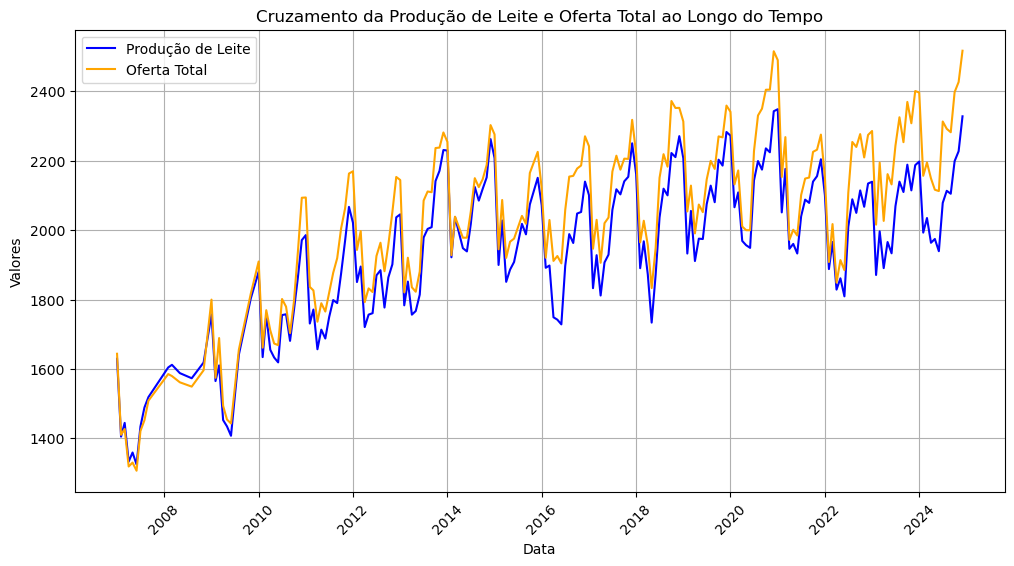

In [50]:
plt.figure(figsize=(12, 6))

# Plotando a produção de leite ao longo do tempo
sns.lineplot(data=dados, x='data', y='producao_leite', color='b', label='Produção de Leite')

# Plotando a oferta total ao longo do tempo
sns.lineplot(data=dados, x='data', y='oferta_total', color='orange', label='Oferta Total')

plt.title('Cruzamento da Produção de Leite e Oferta Total ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Valores')
plt.xticks(rotation=45)

plt.legend()
plt.grid(True)
plt.show()

Análise

Observa-se que as variáveis produção de leite e oferta total apresentam comportamentos semelhantes ao longo do tempo, o que é esperado, já que a produção nacional compõe uma parte significativa da oferta total. No entanto, entre os anos de 2016 e 2018, houve uma queda acentuada na produção de leite. Apesar disso, a oferta total foi parcialmente mantida devido ao aumento das importações nesse período, o que ajudou a suprir a demanda interna e amenizar os impactos da redução na produção local.

Com base nisso, iremos calcular a demanda total de cada periodo utilizando a fórmula 

- demanta_total = oferta_per_capita x (populacao * 1000000).

Isso vai nos ajudar a identificar em quais períodos ouve uma demanda onde a quantidade interna não seria suficiente para suprir as necessidades internas.

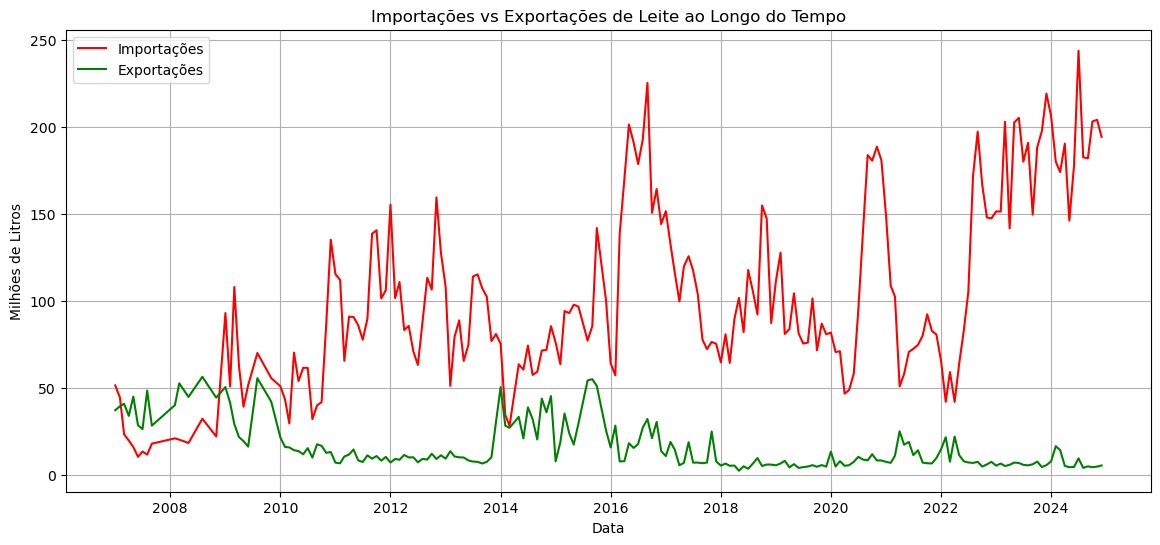

In [53]:
plt.figure(figsize=(14, 6))
plt.plot(dados['data'], dados['importacoes'], label='Importações', color='red')
plt.plot(dados['data'], dados['exportacoes'], label='Exportações', color='green')
plt.title('Importações vs Exportações de Leite ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Milhões de Litros')
plt.legend()
plt.grid(True)
plt.show()

Análise

Com base no gráfico. É possível observar que um pouco antes de 2008 até 2009 a quantidade de importações era menor que a quantidade de exportações. Nesse sentido, o país estava exportando mais do que comprando esses produtos a fora.

- A partir de 2010, o pais praticamente abandona a exportação de leite, mantendo volumes baixos, enquanto as importações aumentam expressivamente.
- Momentos como 2016, 2021 e 2024 apresentam picos superiores a 200 milhões de litros importados. Isso pode estar relacionado a crises de produção interna ou até mesmo câmbio favorável à importação. 
- O pais não consegue se manter como exportador competitivo de leite e isso pode estar ligado a custo de produção alto, baixa competitividadade internacional e entre outras causas.

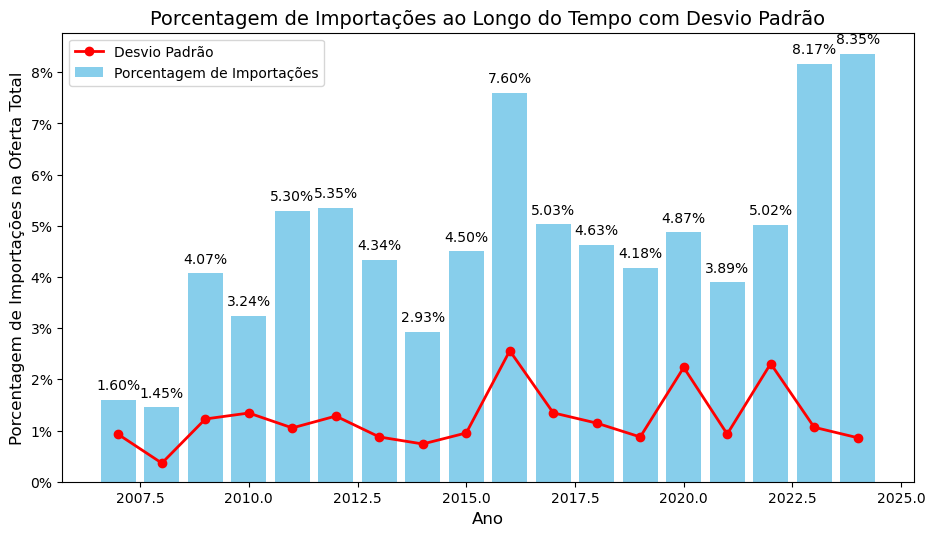

Média das porcentagens de importações ao longo do tempo: 4.69%


In [ ]:
# Calcular a diferença percentual de importações
dados['importacao%_oferta_total'] = (dados['importacoes'] / dados['oferta_total']) * 100

# Calcular a média e desvio padrão por ano
resultados_anuais = dados.groupby('ano')['importacao%_oferta_total'].agg(['mean', 'std']).reset_index()

# Criar o gráfico
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(resultados_anuais['ano'], resultados_anuais['mean'], color='skyblue', label='Porcentagem de Importações')


for bar in bars:
    yval = bar.get_height()
    
    ax.text(
        bar.get_x() + bar.get_width() / 2, 
        yval + 0.2,  
        f'{yval:.2f}%',  
        ha='center',  
        fontsize=10, 
        color='black'
    )

# Plotando a linha de desvio padrão (em vermelho)
ax.plot(resultados_anuais['ano'], resultados_anuais['std'], color='red', label='Desvio Padrão', marker='o', markersize=6, linestyle='-', linewidth=2)

# Definindo rótulos e título
ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Porcentagem de Importações na Oferta Total', fontsize=12)
ax.set_title('Porcentagem de Importações ao Longo do Tempo', fontsize=14)
ax.legend()

# Formatar o eixo y como porcentagem
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))

plt.tight_layout(pad=3.0)
plt.show()


media_percentual = resultados_anuais['mean'].mean()
print(f'Média das porcentagens de importações ao longo do tempo: {media_percentual:.2f}%')

### Principais Insigths

- Preço do leite no supermercado vs. valor pago ao produtor:
Embora o preço do leite no supermercado e o valor pago ao produtor estejam altamente correlacionados, o que faz sentido já que o valor final depende diretamente dos custos de produção, observamos que existe uma diferença estatisticamente significativa entre eles. Para que o empresário obtenha lucro, é necessário que o preço no supermercado seja consideravelmente maior que o valor pago ao produtor.

- Importações e exportações:
Os dados mostram um aumento consistente no valor das importações ao longo do tempo, enquanto as exportações apresentaram uma queda significativa. Isso indica que a empresa tem importado mais do que exportado, o que pode sinalizar uma dependência crescente de produtos estrangeiros ou dificuldades em manter a competitividade no mercado externo.

- Produção de leite vs. taxa de desemprego:
Não foi observada uma diferença relevante na produção de leite entre os períodos com maior ou menor taxa de desemprego. Isso pode ser explicado pela natureza do setor, em que muitos profissionais da área são experientes e permanecem na atividade por toda a vida, o que reduz o impacto das variações do desemprego na produção leiteira.

- Sazonalidade no valor pago ao produtor:
A análise mostra que não há uma variação significativa no valor pago ao produtor ao longo dos meses do ano. Isso indica que não há uma sazonalidade marcante na produção do leite. Por se tratar de um alimento básico e com demanda crescente, acompanhando o crescimento populacional, a produção tende a se manter estável ao longo do ano.

- Tendência da taxa de desemprego:
A taxa de desemprego apresentou uma tendência de alta constante entre 2014 e 2021, com uma queda visível a partir de 2021. Essa oscilação pode estar relacionada a fatores econômicos diversos, como recessões, políticas públicas e crises setoriais.

- Tendência do preço do leite no supermercado:
Foi identificada uma tendência de aumento no preço médio do leite no supermercado. Esse crescimento pode ser explicado pelo aumento na demanda do produto, o que, aliado à inflação e aos custos de produção, impulsiona os preços ao consumidor.

- Diferença entre importações e exportações:
O valor das importações é significativamente maior que o das exportações, e essa diferença é estatisticamente relevante. Isso sugere que a empresa tem comprado mais do exterior do que vendido, possivelmente devido a uma produção interna insuficiente para atender à demanda local. Além disso, foi analisado que essa diferença só tende a crescer ao passar do tempo.




In [77]:
dados.to_csv(r"C:\Users\eduar\OneDrive\Documentos\SandoBox\Projetos\PriceCast\Dataset\dados_2.csv")